In [1]:
# Imports 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking the null values and replacing them
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col,df[col].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


<AxesSubplot:>

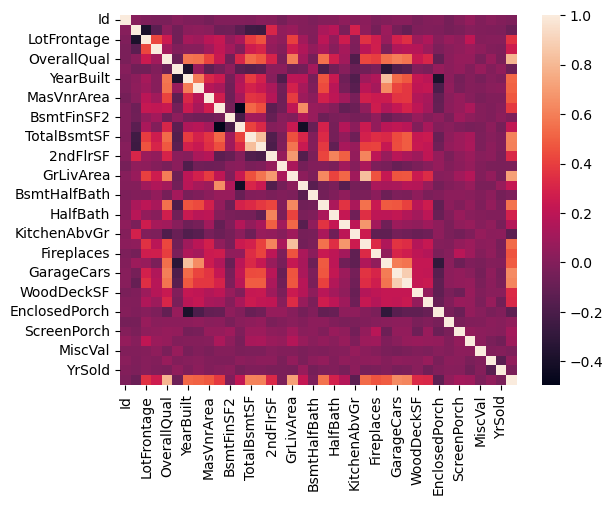

In [5]:
sns.heatmap(df.corr())

In [6]:
highly_correlated = ['OverallQual','OverallCond','GrLivArea','GarageCars','GarageArea','YearBuilt','TotalBsmtSF','GarageYrBlt','GarageCars']

In [7]:
# Data cleaning

value = {k: v for v, k in enumerate([])}

df['GarageQual'].head()


0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

In [8]:
GarageFinish = {"Fin":3,"RFn":2	,"Unf":1	}
df['GarageFinish'].replace(GarageFinish,inplace=True)
df_test['GarageFinish'].replace(GarageFinish,inplace=True)



In [9]:
# This one is for the qualities
quality = {"Ex":5,"Gd":4,"TA":3,"Fa":2	,"Po":1	,"NA":0}
qualityColumns = ['ExterQual','ExterCond','BsmtQual',"BsmtCond",'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for col in qualityColumns:
    df[col].replace(quality,inplace=True)

for col in qualityColumns:
    df_test[col].replace(quality,inplace=True)

In [10]:
df_important = df[highly_correlated+['Id','SalePrice']]
df_important.head()

df_test_important = df_test[highly_correlated]


In [11]:
df_important['GarageYrBlt'] = df_important['YearBuilt']
df_test_important['GarageYrBlt'] = df_test_important['YearBuilt']
df_test_important.isna().sum()


/var/folders/4t/v7knhhcx0znchlvbrq8w69200000gn/T/ipykernel_94506/1609785607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important['GarageYrBlt'] = df_important['YearBuilt']
/var/folders/4t/v7knhhcx0znchlvbrq8w69200000gn/T/ipykernel_94506/1609785607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_important['GarageYrBlt'] = df_test_important['YearBuilt']


OverallQual    0
OverallCond    0
GrLivArea      0
GarageCars     1
GarageArea     1
YearBuilt      0
TotalBsmtSF    1
GarageYrBlt    0
GarageCars     1
dtype: int64

In [12]:
df_test_important.fillna(0)

,OverallQual,OverallCond,GrLivArea,GarageCars,GarageArea,YearBuilt,TotalBsmtSF,GarageYrBlt,GarageCars
0,5,6,896,1.0,730.0,1961,882.0,1961,1.0
1,6,6,1329,1.0,312.0,1958,1329.0,1958,1.0
2,5,5,1629,2.0,482.0,1997,928.0,1997,2.0
3,6,6,1604,2.0,470.0,1998,926.0,1998,2.0
4,8,5,1280,2.0,506.0,1992,1280.0,1992,2.0
...,...,...,...,...,...,...,...,...,...
1454,4,7,1092,0.0,0.0,1970,546.0,1970,0.0
1455,4,5,1092,1.0,286.0,1970,546.0,1970,1.0
1456,5,7,1224,2.0,576.0,1960,1224.0,1960,2.0
1457,5,5,970,0.0,0.0,1992,912.0,1992,0.0


In [13]:
# Selecting data for modeling
y  = df_important['SalePrice']
x = df_important.drop(['SalePrice'],axis=1)

In [14]:
# Modeling
# Modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

x_train , x_test , y_train, y_test = train_test_split(x,y,train_size=0.33,random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7477959809774481

In [16]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_test,y_test)
#Seems to perform the best

0.8069401340098027

In [17]:
en =  ElasticNet()
en.fit(x_train,y_train)
en.score(x_test,y_test)


/Users/slimanitz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.451e+11, tolerance: 2.558e+08
  model = cd_fast.enet_coordinate_descent(


0.7355754472118673

In [18]:
df_test_important['Id'] = df_test['Id']

/var/folders/4t/v7knhhcx0znchlvbrq8w69200000gn/T/ipykernel_94506/3867169868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_important['Id'] = df_test['Id']


In [24]:
df_test_important.isna().sum()

OverallQual    0
OverallCond    0
GrLivArea      0
GarageCars     0
GarageArea     0
YearBuilt      0
TotalBsmtSF    0
GarageYrBlt    0
GarageCars     0
Id             0
dtype: int64

In [29]:
prediction = lr.predict(df_test_important)
len(prediction)

1459

In [30]:
df_submission = pd.DataFrame({'Id':df_test_important['Id'],'SalePrice':prediction})
df

df_submission.to_csv('submission.csv',index=False)

: 